# Chapter 6 - Course, Tide and Leeway

_Copyright @2022 p6steve, please see Chapter 1 for Terms of Use_

This chapter will develop the ideas that we met previously and will present both raku and navigation concepts cell by cell.

First, Jupyter notebooks need us to repeat a little preamble each time...

In [1]:
use Physics::Navigation;
use Physics::Measure;

## Course

So far, we have sailed on seas without considering the effect of wind and tide. Now let's take a look at how we can factor in the elements to safely reach our destination...

- Course embodies the vector identity - CTS = COG + TAV [+leeway]
- Course To Steer, Course Over Ground, Tide Average Velocity
- there is an implicit time interval since TAV is tide _Speed_ (knots) + Bearing

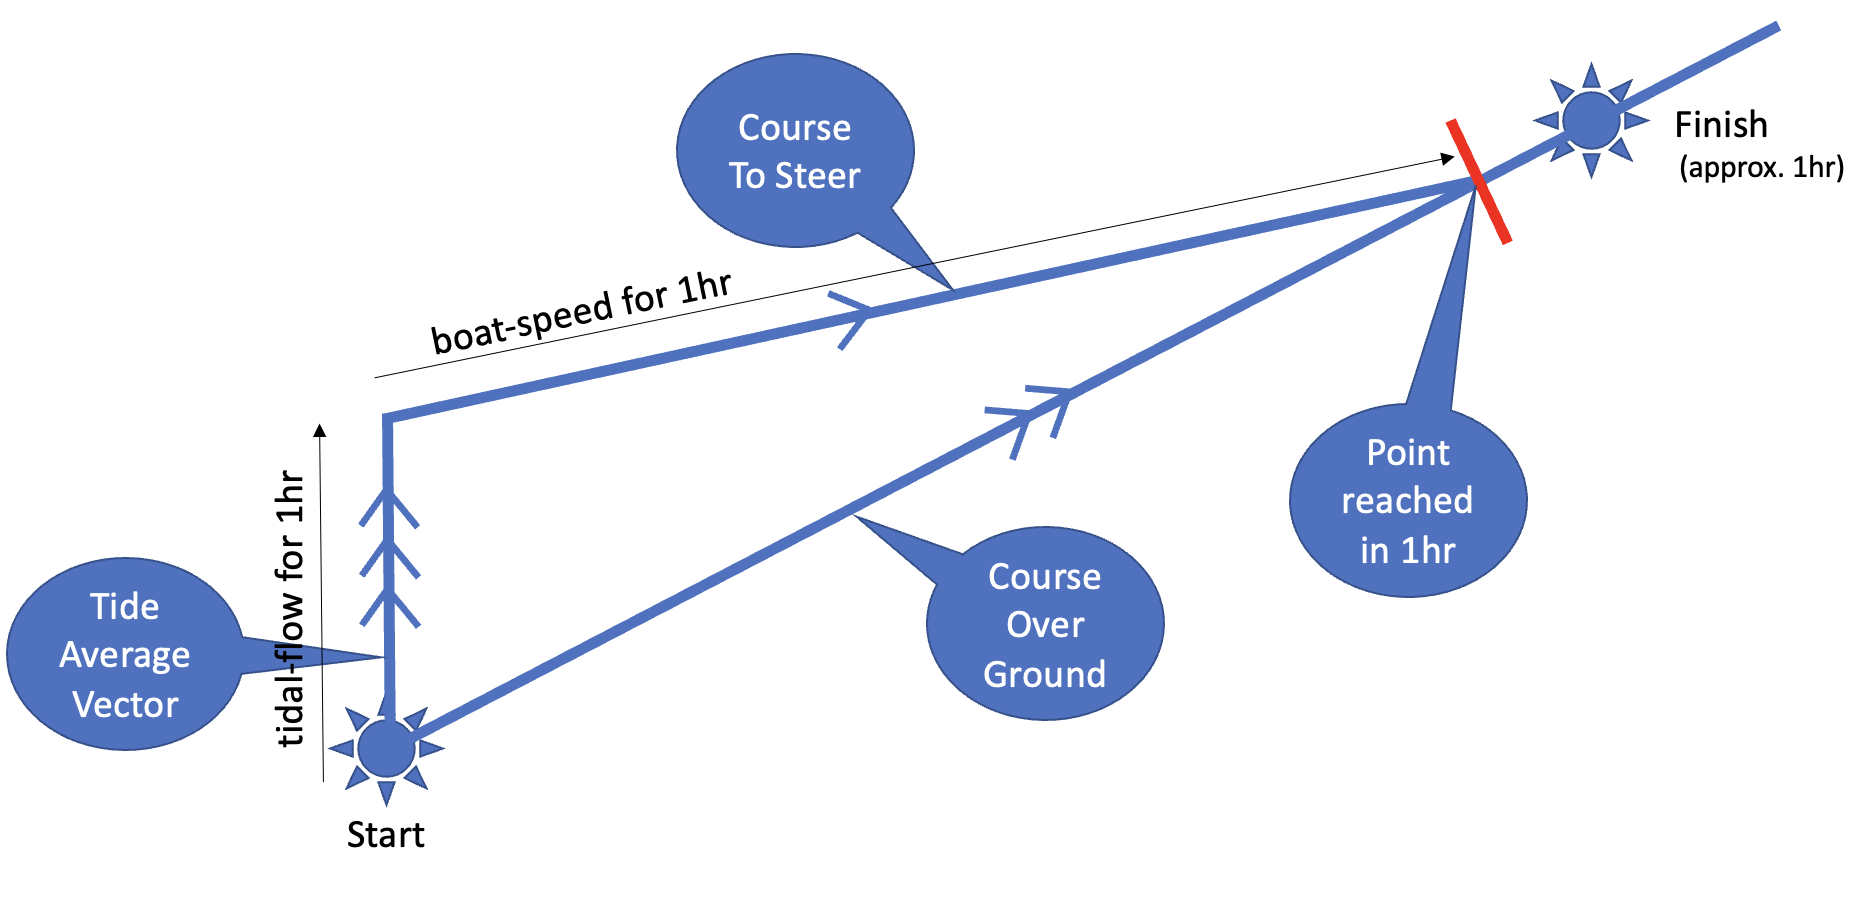

Hint: the Bearings in the diagram are not the same as those in the code examples (but you can always fix that!).

In the Physics::Navigation module, the following data structure is declared:

In [2]:
#our %course-info is export = %(
#    leeway     => CourseAdj.new( value => 0,  compass => <Sb> ),
#    interval   => Time.new( value => 1,  units => 'hours' ),
#    boat-speed => Speed.new( value => 5, units => 'knots' ),
#);

()

Hint: this code introduces a couple of new raku concepts:
- the 'our' declarator means that this variable is visible to all parts of the program (in contrast, 'my' variables are confined to a specific {} blaock)
- the '%' symbol denotes a 'hash' structure which contained named items - leeway, interval, boat-speed
- the values are loaded with defaults ...

So to set a boat-speed of 6.5 knots...

In [3]:
%course-info<boat-speed> =  ♓️'6.5 knots';

6.5knot

## Tide

Nautical charts and almanacs, as well as many websites, provide accurate predictions of the tide speed and direction depending on the date, the time of day and the location. Since the tide rises and falls over the course of several hours, the usual practice is to apply an estimate of the tide average velocity each hour. Thus the default time interval in our %course-info.

In [5]:
my $tidal-flow = Velocity.new( θ => ♓️<112°T>, s => ♓️'2.2 knots' );   say "$tidal-flow";

(112°ESE (T), 2.2knot)


## Leeway

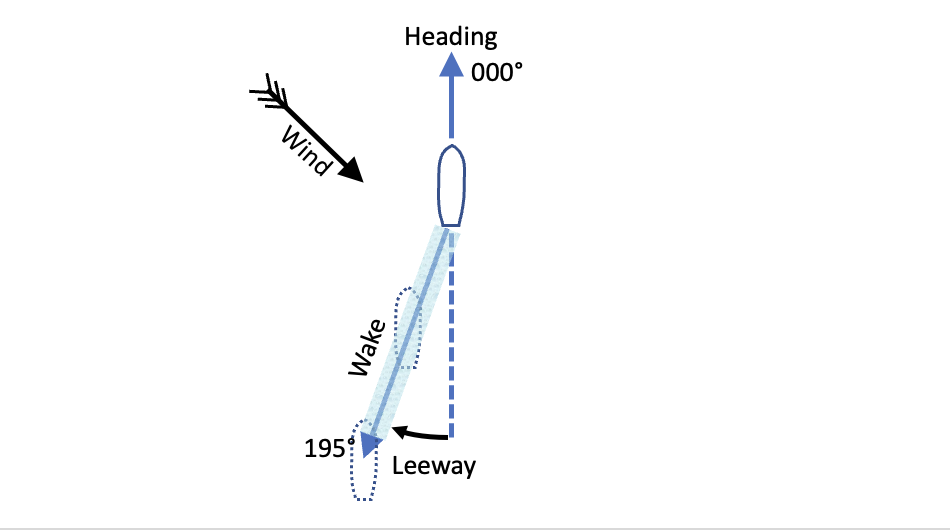

When sailing in wind, you will get pushed sideways off your intended course unless its coming directly from the bow or the stern. This sideways motion is called "leeway", it is usually stated as a Course Adjustment bearing to Port or Starboard. To maintain your Bearing through the water, you need to  adjust your steering towards the wind.

In practice, you can easily determine your leeway:

1. Use a hand bearing compass to take a bearing dead astern. To do this, stand on the centerline and sight through the backstay.

2. Take a second compass bearing on your boat's wake trail. The difference between the two bearings gives you the sailing leeway angle.

3. Calculate the compass course you need to steer to offset leeway. If on port tack, subtract the leeway angle; if on starboard tack, add the leeway angle. Check your leeway angle every so often in case it changes.

In [10]:
%course-info<leeway> = ♓️<1°Pt>;

01°0′Pt

## Course (coda)

Now we have set all the aspects of our course, we can go ahead and use it. We need to feed in the desired Course Over Ground Bearing and the tidal flow we just created.

In [11]:
my $course = Course.new( over-ground => ♓️<22°T>, :$tidal-flow );  say "$course";

Course to steer: 002°N (T)


That's cool, if we output our new course, it tells us our Course to steer to get there.

Hint: raku has many tricks up its sleeve - here you see how `:$xxx` is a shortcut for `xxx => $xxx`

In [12]:
$Physics::Measure::round-val = 0.1;

say $course.speed-over-ground.in('knots');

6.2knot


And we can use the _.speed_over_ground_ method to check that we will be there before closing time despite the effects of wind and tide.